$$ \large{ \rm \textbf{ Belarusian State University }}$$
$$ \large{ \rm \textbf{ Faculty of Applied Mathematics and Computer Science }} $$
$$ \large{ \rm \textbf{ Department of Probability Theory and Mathematical Statistics }} $$
 
$$ \normalsize{ \rm \text{Numerical  methods  of  mathematical  physics } } $$
$$ \normalsize{ \rm \text {"The method of grids  for solving the boundary value problem for ODE"} }$$


$$ \small{ \rm  \text{Variant: 7 } } $$
$$ \small{ \rm  \text{Cource: 3 }} $$ 
$$ \small{ \rm  \text{Group: 7  }} $$ 
$$ \small{ \rm  \text{Completed by: Kushner I.A. }} $$ 
$$ \small{ \rm  \text{Teacher: Gorbacheva Yu.N. }} $$

$\large{ \textbf{Input task}}$

$u^{''} + \frac{3x}{x^2 + 1}u^{'} - \frac{2}{x^2 + 1}u^{'}u = -\frac{4x^2 + 8}{(x^2 + 1)^3} \\
5u(0.5) = 8 \\
3u(1) + 2u^{'}(1) = 1$

In [9]:
import numpy as np;
import matplotlib.pyplot as plt

In [10]:
#left sweep method
def sweep_method(matrix, value_vector):
    a=np.diag(matrix,-1)*(-1)
    a=np.insert(a,0,0)
    c=np.diag(matrix)
    b=np.diag(matrix,1)*(-1)
    s=len(matrix)
    p=np.zeros(s)
    n=np.zeros(s)
    y=np.zeros(s)
    s=s-1
    p[s]=a[s]/c[s]
    for i in range(s-1,0,-1):
        p[i]=a[i]/(c[i]-p[i+1]*b[i])
    n[-1]=value_vector[-1]/c[-1]
    for i in range(s-1,-1,-1):
        n[i]=(value_vector[i]+b[i]*n[i+1])/(c[i]-p[i+1]*b[i])
    y[0]=n[0]
    for i in range(s):
        y[i+1]=p[i+1]*y[i]+n[i+1]    
    return y


In [11]:
#diagonal dominance test
def check_diagonal_dominance(matrix) :
    lines_column = len(matrix)
    main_index = 0
    for item in matrix :
        if np.abs(item[main_index]) < np.sum(np.abs(item)) - np.abs(item[main_index]) :
            return False;
        main_index = main_index + 1
    return True;


In [12]:
#coef matrix
def create_index_approx_matrix(fst_cf, scnd_cf, pen_cf, lst_cf, prev_cfs, cur_cfs, nxt_cfs, N, h, start_x) :
    result = []
    for index in range(0,N + 1) :
        cfs = [0 for i in range(index - 1)]
        current_arg = index * h + start_x
        if(index == 0) :
            cfs.append(fst_cf(h, current_arg))
            cfs.append(scnd_cf(h, current_arg))
        elif(index == N) :
            cfs.append(pen_cf(h, current_arg))
            cfs.append(lst_cf(h, current_arg))
        else :
            cfs.append(prev_cfs(h, current_arg))
            cfs.append(cur_cfs(h, current_arg))
            cfs.append(nxt_cfs(h, current_arg))
            
        while(len(cfs) < N+1) : cfs.append(0)
        result.append(cfs)
    return result

#value vector
def create_index_approx_value_vector(first, middle, last, start_x, h, N) :
    result = []
    for index in range(N + 1):
        current_x = start_x + index * h
        if(index == 0):
            result.append(first(h, current_x))
        elif(index == N):
            result.append(last(h, current_x))
        else:
            result.append(middle(h, current_x))
    return result;


$\large{ \textbf{non-indexed form} }$

$$\begin{equation*}
 \begin{cases}
   y(x)_{ \bar{x}x} + \frac{3x}{x^2 + 1} y(x)_{\hat{x}} - \frac{2}{x^2 + 1}y(x) = -\frac{4x^2 + 1}{(x^2 + 1)^3} \\
   5y(0.5) = 8 \\
   y(1) + \eta y(1)_{\bar x} = c
 \end{cases}
\end{equation*}$$

$u(1) + \eta u(1)^{'} - c = u(1) + \eta (u^{'}(1) - \frac{h}{2}u^{''}(1) + O(h^{2})) - c = \\ = [u^{''}(1) = - \frac{3}{2} - \frac{3}{2}u^{'}(1)] = \\ = u(1) + \eta (\frac{1}{2} - \frac{3}{2}y(1) - \frac{h}{2}(-\frac{9}{4} + \frac{13}{4}u(1))) - c + O(h^2) = \\ = u(1)(1 - \eta \frac{3}{2} - \eta \frac{13h}{8}) + \frac{1}{2} \eta + \frac{9 \eta h}{8} - c + O(h^2)$

$$\begin{equation*}
 \begin{cases}
   1 - \eta \frac{3}{2} - \eta h \frac{13}{8} = 0\\
   \frac{1}{2} \eta + \eta h \frac{9}{8} - c = 0
 \end{cases}
\end{equation*}$$

$$\begin{equation*}
 \begin{cases}
   \eta = \frac{8}{12 + 13h}\\
   c = \frac{4+9h}{12 + 13h}
 \end{cases}
\end{equation*}$$

$\large{ \textbf{indexed form} }$

$y_{i - 1}(\frac{1}{h^2} - \frac{3x_i}{2h(x_{i}^{2} + 1)}) + y_i(-\frac{2}{h^2} - \frac{2}{x_{i}^2 + 1}) + y_{i+1}(\frac{1}{h^2} + \frac{3x_i}{2h(x_{i}^2 +1)}) = -\frac{4x_{i}^2 + 8}{(x^2 + 1)^3}\\
5y_0 = 8\\
y_{n-1}(-\frac{8}{12h + 13h^2}) + y_n(1 + \frac{8}{12h + 13h^2}) = \frac{4 + 9h}{12 +13h}$

In [13]:
h = 0.1
N = 5;
start_x = 0.5;

yi_p = lambda h, x : (1/h**2 - (3*x)/(2*h*(x**2 + 1)))
yi = lambda h, x: (-2/h**2 - 2/(x**2 + 1))
yi_n = lambda h, x: (1/h**2 + (3*x)/(2*h*(x**2 + 1)))

y0 = lambda h, x: 5
y1 = lambda h, x: 0
yn_p = lambda h, x: -(8/(12 * h + 13 * h**2))
yn = lambda h, x: (1 + (8/(12 * h + 13 * h**2)))

f0 = lambda h,x: 8
fi = lambda h,x: -(4 * x**2 + 8) / (x**2 + 1)**3
fn = lambda h,x: (4 + 9 * h) / (12 + 13*h)


In [14]:
#точное значение функции
def f(arg):
    return 2/(arg**2 + 1)

diagonal dominance check: True
error vector l1 norm = 0.0019248870211719948


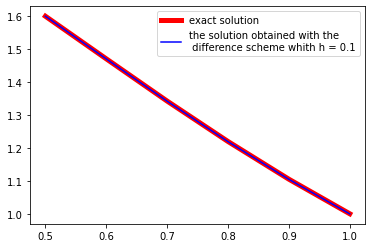

In [15]:
# h = 0,1
approx_matrix = create_index_approx_matrix(y0, y1, yn_p, yn, yi_p, yi, yi_n, N, h, start_x)
approx_value_vector = create_index_approx_value_vector(f0,fi,fn,start_x,h,N)
res = sweep_method(approx_matrix, approx_value_vector)

print('diagonal dominance check: ' + str(check_diagonal_dominance(approx_matrix)))


x = np.arange(0.5,1.01,0.1)
y = [f(i) for i in x] 

plt.plot(x,y,'r', linewidth = 5, label = 'exact solution')
plt.plot(x, res, 'b', label = 'the solution obtained with the \n difference scheme whith h = 0.1')
plt.legend()
print('error vector l1 norm = ' + str(np.sum(np.abs(res - y))))
plt.show();

diagonal dominance check: True
error vector l1 norm = 0.0009163751758488603


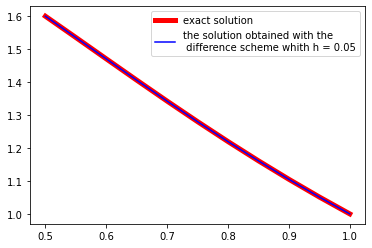

In [16]:
# h = 0,05
args = np.arange(0.5,1.01,0.05)
values = [f(i) for i in args]

m2 = create_index_approx_matrix(y0, y1, yn_p, yn, yi_p, yi, yi_n, 10, 0.05, 0.5)
vv2 = create_index_approx_value_vector(f0,fi,fn,start_x,0.05,10)
res2 = sweep_method(m2, vv2)

print('diagonal dominance check: ' + str(check_diagonal_dominance(m2)))

plt.plot(args,values,'r', linewidth = 5, label = 'exact solution')
plt.plot(args, res2, 'b', label = 'the solution obtained with the \n difference scheme whith h = 0.05')
plt.legend()
print('error vector l1 norm = ' + str(np.sum(np.abs(res2 - values))))
plt.show();
